<a href="https://colab.research.google.com/github/MuhammadMusa1/-Analysttraining/blob/main/Urok5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Просто, понятно, с нуля!**

Часть 1: Настройка среды

In [1]:
# @title 🔧 Установка и импорт библиотек (просто нажмите "Выполнить")
!pip install scikit-learn pandas matplotlib -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Настройки для красивых графиков
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print(" Библиотеки загружены!")
print(" Среда готова к работе!")

 Библиотеки загружены!
 Среда готова к работе!


**Часть 2: Наш первый датасет — ученики в классе**

In [2]:
# @title  Создаём данные об учениках

# Создаём список учеников
data = {
    'Имя': ['Аня', 'Боря', 'Ваня', 'Галя', 'Дима',
            'Егор', 'Женя', 'Зоя', 'Иван', 'Коля',
            'Лена', 'Миша', 'Настя', 'Оля', 'Петя'],

    'Часы_учёбы': [5, 8, 3, 10, 6,
                   12, 4, 9, 7, 11,
                   5, 8, 15, 6, 4],

    'Оценка_за_тест': [3, 4, 2, 5, 4,
                       5, 3, 4, 4, 5,
                       3, 4, 5, 4, 3]
}

# Превращаем в таблицу
df = pd.DataFrame(data)

# Показываем таблицу
print("📋 Наши ученики:")
display(df)  # Красивое отображение в Colab
print(f"\n Всего учеников: {len(df)}")

📋 Наши ученики:


,Имя,Часы_учёбы,Оценка_за_тест
0,Аня,5,3
1,Боря,8,4
2,Ваня,3,2
3,Галя,10,5
4,Дима,6,4
5,Егор,12,5
6,Женя,4,3
7,Зоя,9,4
8,Иван,7,4
9,Коля,11,5



 Всего учеников: 15


**Часть 3: Визуализация — смотрим на данные**

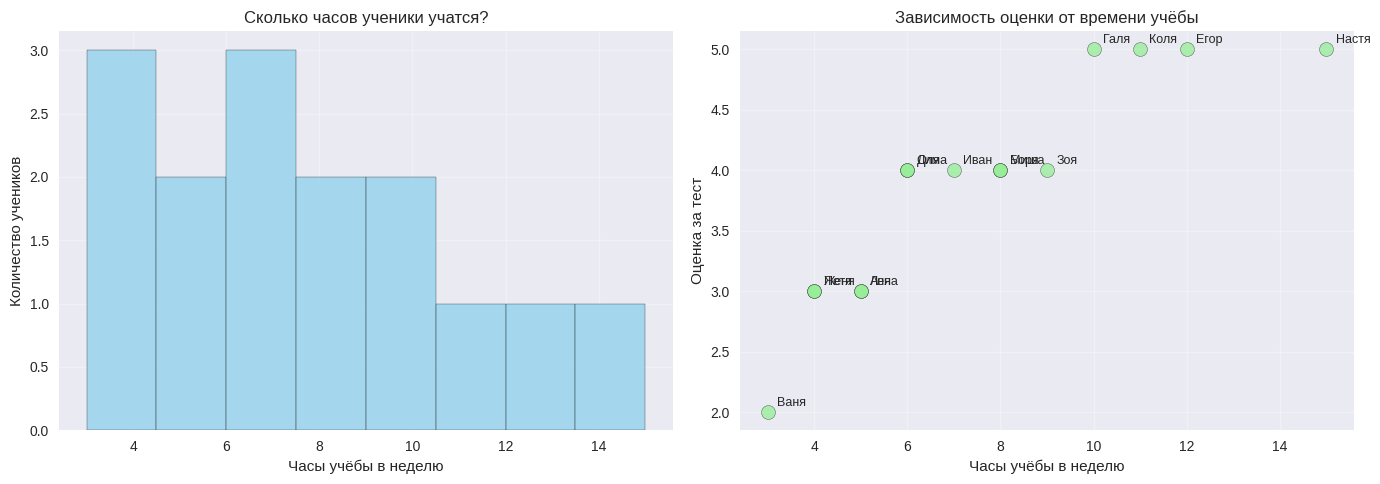

 Что мы видим?
1. Большинство учеников учатся 4-10 часов
2. Есть связь: больше учишься → выше оценка
3. Но не всегда! (посмотрите на Аню и Колю)


In [3]:
# @title 📊 Строим графики
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# График 1: Распределение часов учёбы
axes[0].hist(df['Часы_учёбы'], bins=8, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Часы учёбы в неделю')
axes[0].set_ylabel('Количество учеников')
axes[0].set_title('Сколько часов ученики учатся?')
axes[0].grid(True, alpha=0.3)

# График 2: Связь учёбы и оценок
axes[1].scatter(df['Часы_учёбы'], df['Оценка_за_тест'],
                s=100, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Часы учёбы в неделю')
axes[1].set_ylabel('Оценка за тест')
axes[1].set_title('Зависимость оценки от времени учёбы')
axes[1].grid(True, alpha=0.3)

# Добавляем имена на точки
for i, row in df.iterrows():
    axes[1].text(row['Часы_учёбы'] + 0.2, row['Оценка_за_тест'] + 0.05,
                row['Имя'], fontsize=9)

plt.tight_layout()
plt.show()

print(" Что мы видим?")
print("1. Большинство учеников учатся 4-10 часов")
print("2. Есть связь: больше учишься → выше оценка")
print("3. Но не всегда! (посмотрите на Аню и Колю)")

**Часть 4: Наша вторая модель ML!**

In [4]:
# @title  Готовим данные для модели

# X — что мы знаем (часы учёбы)
# y — что хотим предсказать (оценка)
X = df[['Часы_учёбы']]  # Двойные скобки — важно для sklearn!
y = df['Оценка_за_тест']

print(" Признаки (X):")
print(X.head())
print(f"\n Цель (y):")
print(y.head())
print(f"\n Размер X: {X.shape}")
print(f" Размер y: {y.shape}")

 Признаки (X):
   Часы_учёбы
0           5
1           8
2           3
3          10
4           6

 Цель (y):
0    3
1    4
2    2
3    5
4    4
Name: Оценка_за_тест, dtype: int64

 Размер X: (15, 1)
 Размер y: (15,)


In [5]:
# @title  Делим данные на тренировочные и тестовые
from sklearn.model_selection import train_test_split

# Разделяем: 80% — учим модель, 20% — проверяем
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42  # random_state=42 для одинаковых результатов
)

print(" Данные разделены!")
print(f" Тренировочные: {len(X_train)} учеников")
print(f" Тестовые: {len(X_test)} учеников")
print("\n Кто попал в тестовые?")
test_indices = X_test.index
print(df.loc[test_indices, ['Имя', 'Часы_учёбы', 'Оценка_за_тест']])

 Данные разделены!
 Тренировочные: 12 учеников
 Тестовые: 3 учеников

 Кто попал в тестовые?
     Имя  Часы_учёбы  Оценка_за_тест
9   Коля          11               5
11  Миша           8               4
0    Аня           5               3


**Часть 5: Линейная регрессия — самая простая модель**

In [6]:
# @title  Обучаем первую модель!
from sklearn.linear_model import LinearRegression

# Создаём модель
model = LinearRegression()

# Обучаем модель на тренировочных данных
model.fit(X_train, y_train)

print(" Модель обучена!")
print(f"\n Уравнение модели: Оценка = {model.intercept_:.2f} + {model.coef_[0]:.2f} × Часы_учёбы")
print(f" Это значит: каждый час учёбы добавляет {model.coef_[0]:.2f} балла к оценке")

# Проверяем на тренировочных данных
train_predictions = model.predict(X_train)
train_accuracy = np.mean((train_predictions - y_train) ** 2)
print(f"\n Ошибка на тренировочных данных: {train_accuracy:.3f}")

 Модель обучена!

 Уравнение модели: Оценка = 2.11 + 0.23 × Часы_учёбы
 Это значит: каждый час учёбы добавляет 0.23 балла к оценке

 Ошибка на тренировочных данных: 0.168


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


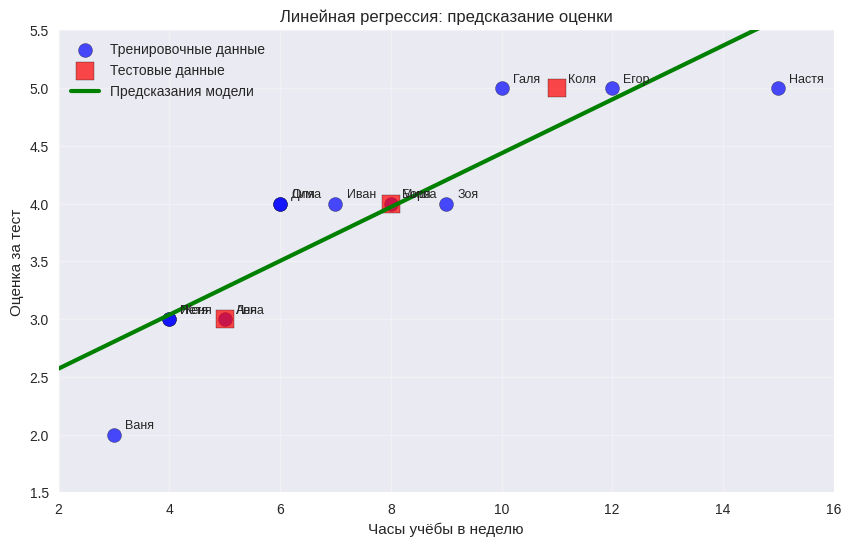

In [7]:
# @title  Визуализируем нашу модель
plt.figure(figsize=(10, 6))

# Точки тренировочных данных
plt.scatter(X_train, y_train, color='blue', s=100,
            label='Тренировочные данные', alpha=0.7, edgecolor='black')

# Точки тестовых данных
plt.scatter(X_test, y_test, color='red', s=150, marker='s',
            label='Тестовые данные', alpha=0.7, edgecolor='black')

# Линия регрессии
x_line = np.linspace(0, 16, 100).reshape(-1, 1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, color='green', linewidth=3, label='Предсказания модели')

# Подписи точек
for i, row in df.iterrows():
    plt.text(row['Часы_учёбы'] + 0.2, row['Оценка_за_тест'] + 0.05,
             row['Имя'], fontsize=9)

plt.xlabel('Часы учёбы в неделю')
plt.ylabel('Оценка за тест')
plt.title('Линейная регрессия: предсказание оценки')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(2, 16)
plt.ylim(1.5, 5.5)
plt.show()

**Часть 6: Проверяем модель на тестовых данных**

In [8]:
# @title  Тестируем модель на новых данных

# Делаем предсказания для тестовых данных
test_predictions = model.predict(X_test)

print(" Тестируем на учениках, которых модель НЕ видела:")
print("-" * 40)

for i, (true, pred) in enumerate(zip(y_test, test_predictions)):
    hours = X_test.iloc[i]['Часы_учёбы']
    name = df.loc[X_test.index[i], 'Имя']

    print(f"{name}: Учится {hours} часов")
    print(f"   Модель предсказывает: {pred:.1f}")
    print(f"   Реальная оценка: {true}")
    print(f"   Ошибка: {abs(pred - true):.2f}")
    print()

# Считаем общую ошибку
test_error = np.mean((test_predictions - y_test) ** 2)
print(f" Средняя ошибка на тестовых данных: {test_error:.3f}")

 Тестируем на учениках, которых модель НЕ видела:
----------------------------------------
Коля: Учится 11 часов
   Модель предсказывает: 4.7
   Реальная оценка: 5
   Ошибка: 0.33

Миша: Учится 8 часов
   Модель предсказывает: 4.0
   Реальная оценка: 4
   Ошибка: 0.03

Аня: Учится 5 часов
   Модель предсказывает: 3.3
   Реальная оценка: 3
   Ошибка: 0.27

 Средняя ошибка на тестовых данных: 0.061


 Часть 7: Делаем прогнозы для новых учеников

In [9]:
# @title  Предсказываем оценки новых учеников!

# Новые ученики (модель их ещё не видела!)
new_students = pd.DataFrame({
    'Имя': ['Саша', 'Таня', 'Федя'],
    'Часы_учёбы': [7, 14, 2]
})

print(" Новые ученики:")
display(new_students)

# Делаем предсказания
X_new = new_students[['Часы_учёбы']]
predictions = model.predict(X_new)

print("\n Прогноз модели:")
print("-" * 30)
for i, (name, hours, pred) in enumerate(zip(new_students['Имя'],
                                           new_students['Часы_учёбы'],
                                           predictions)):
    print(f"{name}: учится {hours} часов")
    print(f"  → Предсказанная оценка: {pred:.1f}")

    if pred >= 4.5:
        print("   Отличник!")
    elif pred >= 3.5:
        print("   Хорошист!")
    else:
        print("   Нужно больше заниматься!")
    print()

 Новые ученики:


,Имя,Часы_учёбы
0,Саша,7
1,Таня,14
2,Федя,2



 Прогноз модели:
------------------------------
Саша: учится 7 часов
  → Предсказанная оценка: 3.7
   Хорошист!

Таня: учится 14 часов
  → Предсказанная оценка: 5.4
   Отличник!

Федя: учится 2 часов
  → Предсказанная оценка: 2.6
   Нужно больше заниматься!



**Часть 8: Кросс-валидация — проверяем надёжность**

In [10]:
# @title 🔄 Проверяем модель разными способами
from sklearn.model_selection import cross_val_score

print("🔄 Проверяем модель с помощью кросс-валидации")
print("(Делим данные на 5 частей, проверяем 5 раз)")

# Используем 5-Fold кросс-валидацию
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Преобразуем отрицательные MSE в положительные
mse_scores = -scores

print("\n📊 Результаты 5 проверок:")
for i, score in enumerate(mse_scores, 1):
    print(f"Проверка {i}: MSE = {score:.3f}")

print(f"\n📈 Средний MSE: {mse_scores.mean():.3f}")
print(f"📏 Разброс MSE: ±{mse_scores.std():.3f}")

print("\n💡 Что это значит?")
print("• MSE показывает среднюю квадратичную ошибку")
print("• Чем меньше MSE, тем лучше модель")
print("• Маленький разброс (±) → модель стабильная")

🔄 Проверяем модель с помощью кросс-валидации
(Делим данные на 5 частей, проверяем 5 раз)

📊 Результаты 5 проверок:
Проверка 1: MSE = 0.414
Проверка 2: MSE = 0.265
Проверка 3: MSE = 0.041
Проверка 4: MSE = 0.061
Проверка 5: MSE = 0.628

📈 Средний MSE: 0.282
📏 Разброс MSE: ±0.221

💡 Что это значит?
• MSE показывает среднюю квадратичную ошибку
• Чем меньше MSE, тем лучше модель
• Маленький разброс (±) → модель стабильная


**Часть 9: Сравниваем с другой моделью — KNN**

 Сравнение двух моделей:
----------------------------------------
📐 Линейная регрессия:
   • Уравнение: Оценка = 2.11 + 0.23 × Часы
   • Ошибка на тесте: 0.061

👥 KNN (3 соседа):
   • Правило: смотрим на 3 самых похожих ученика
   • Ошибка на тесте: 0.074

🏆 Победитель: Линейная регрессия!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


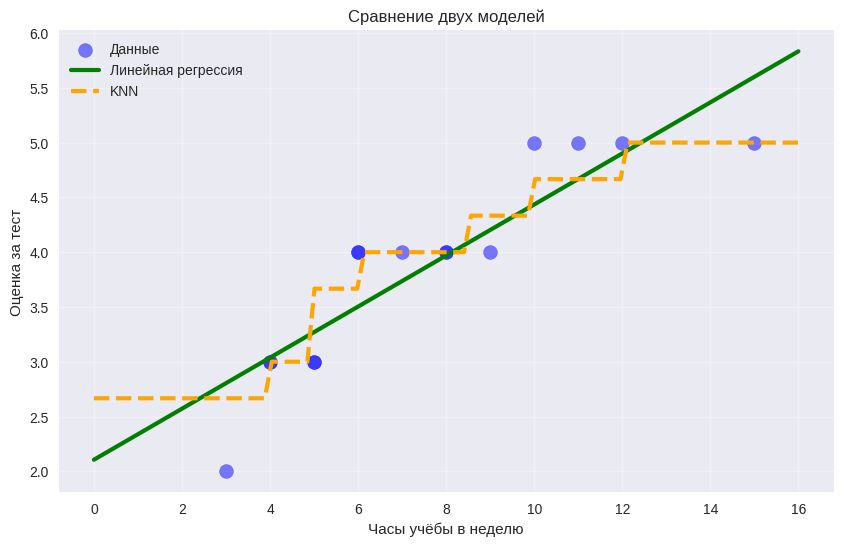

In [11]:
# @title  Сравниваем с моделью KNN
from sklearn.neighbors import KNeighborsRegressor

# Создаём KNN модель
knn_model = KNeighborsRegressor(n_neighbors=3)  # Смотрим на 3 ближайших ученика

# Обучаем
knn_model.fit(X_train, y_train)

# Предсказываем
knn_predictions = knn_model.predict(X_test)
knn_error = np.mean((knn_predictions - y_test) ** 2)

print(" Сравнение двух моделей:")
print("-" * 40)
print(f"📐 Линейная регрессия:")
print(f"   • Уравнение: Оценка = {model.intercept_:.2f} + {model.coef_[0]:.2f} × Часы")
print(f"   • Ошибка на тесте: {test_error:.3f}")

print(f"\n👥 KNN (3 соседа):")
print(f"   • Правило: смотрим на 3 самых похожих ученика")
print(f"   • Ошибка на тесте: {knn_error:.3f}")

print("\n" + "=" * 40)
if test_error < knn_error:
    print("🏆 Победитель: Линейная регрессия!")
else:
    print("🏆 Победитель: KNN!")

# Визуализация сравнения
plt.figure(figsize=(10, 6))

# Данные
plt.scatter(X, y, color='blue', s=100, alpha=0.5, label='Данные')

# Линейная регрессия
plt.plot(x_line, y_line, color='green', linewidth=3, label='Линейная регрессия')

# KNN
knn_line = knn_model.predict(x_line)
plt.plot(x_line, knn_line, color='orange', linewidth=3, linestyle='--', label='KNN')

plt.xlabel('Часы учёбы в неделю')
plt.ylabel('Оценка за тест')
plt.title('Сравнение двух моделей')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

** Часть 10: Отчёт и выводы**

In [12]:
# @title 📝 Наш первый отчёт по ML!

print("=" * 50)
print("📊 ОТЧЁТ ПО ПЕРВОМУ ПРОЕКТУ МАШИННОГО ОБУЧЕНИЯ")
print("=" * 50)

print("\n🎯 ЦЕЛЬ ПРОЕКТА:")
print("Предсказать оценку ученика по количеству часов учёбы")

print("\n📊 ДАННЫЕ:")
print(f"• Количество учеников: {len(df)}")
print(f"• Диапазон часов учёбы: от {df['Часы_учёбы'].min()} до {df['Часы_учёбы'].max()}")
print(f"• Диапазон оценок: от {df['Оценка_за_тест'].min()} до {df['Оценка_за_тест'].max()}")

print("\n🤖 МОДЕЛИ:")
print("1. 📐 Линейная регрессия:")
print(f"   • Уравнение: Оценка = {model.intercept_:.2f} + {model.coef_[0]:.2f} × Часы")
print(f"   • Ошибка (MSE): {test_error:.3f}")

print("\n2. 👥 KNN (3 соседа):")
print(f"   • Правило: средняя оценка 3х самых похожих учеников")
print(f"   • Ошибка (MSE): {knn_error:.3f}")

print("\n🎯 ПРОГНОЗЫ ДЛЯ НОВЫХ УЧЕНИКОВ:")
for i, (name, hours, pred) in enumerate(zip(new_students['Имя'],
                                           new_students['Часы_учёбы'],
                                           predictions)):
    print(f"• {name} ({hours} часов) → {pred:.1f} баллов")

print("\n💡 ВЫВОДЫ:")
print("✅ Мы создали свою первую модель ML!")
print("✅ Модель может предсказывать оценки")
print("✅ Лучше всего работает линейная регрессия")
print("✅ Но есть погрешности — это нормально!")

print("\n🌟 ЧТО ДАЛЬШЕ?")
print("1. Собрать больше данных об учениках")
print("2. Добавить другие признаки (посещаемость, оценки за прошлый год)")
print("3. Попробовать другие модели")
print("4. Сделать веб-приложение для учителей")

print("\n" + "=" * 50)
print("🎉 ВЫ МОЛОДЦЫ! ВАША ПЕРВАЯ МОДЕЛЬ ML ГОТОВА!")
print("=" * 50)

📊 ОТЧЁТ ПО ПЕРВОМУ ПРОЕКТУ МАШИННОГО ОБУЧЕНИЯ

🎯 ЦЕЛЬ ПРОЕКТА:
Предсказать оценку ученика по количеству часов учёбы

📊 ДАННЫЕ:
• Количество учеников: 15
• Диапазон часов учёбы: от 3 до 15
• Диапазон оценок: от 2 до 5

🤖 МОДЕЛИ:
1. 📐 Линейная регрессия:
   • Уравнение: Оценка = 2.11 + 0.23 × Часы
   • Ошибка (MSE): 0.061

2. 👥 KNN (3 соседа):
   • Правило: средняя оценка 3х самых похожих учеников
   • Ошибка (MSE): 0.074

🎯 ПРОГНОЗЫ ДЛЯ НОВЫХ УЧЕНИКОВ:
• Саша (7 часов) → 3.7 баллов
• Таня (14 часов) → 5.4 баллов
• Федя (2 часов) → 2.6 баллов

💡 ВЫВОДЫ:
✅ Мы создали свою первую модель ML!
✅ Модель может предсказывать оценки
✅ Лучше всего работает линейная регрессия
✅ Но есть погрешности — это нормально!

🌟 ЧТО ДАЛЬШЕ?
1. Собрать больше данных об учениках
2. Добавить другие признаки (посещаемость, оценки за прошлый год)
3. Попробовать другие модели
4. Сделать веб-приложение для учителей

🎉 ВЫ МОЛОДЦЫ! ВАША ПЕРВАЯ МОДЕЛЬ ML ГОТОВА!


**Бонус: Интерактивный прогноз**

In [13]:
# @title  Попробуйте сами! (интерактивный блок)

# Создаём слайдер для ввода часов
from ipywidgets import interact, widgets

def predict_grade(hours):
    """Предсказывает оценку по часам учёбы"""
    # Преобразуем в нужный формат
    hours_array = np.array([[hours]])

    # Делаем предсказание
    prediction = model.predict(hours_array)[0]

    # Округляем
    rounded_pred = round(prediction * 2) / 2  # Округляем до 0.5

    # Выводим результат
    print(f"📚 Ученик учится {hours} часов в неделю")
    print(f"🎯 Предсказанная оценка: {rounded_pred:.1f}")
    print(f"📊 Уверенность модели: {abs(prediction - rounded_pred):.3f}")

    # Визуализация
    plt.figure(figsize=(8, 5))

    # Все данные
    plt.scatter(df['Часы_учёбы'], df['Оценка_за_тест'],
                color='blue', s=80, alpha=0.5, label='Другие ученики')

    # Линия модели
    plt.plot(x_line, y_line, color='green', linewidth=2, label='Модель')

    # Наш ученик
    plt.scatter([hours], [rounded_pred],
                color='red', s=200, marker='*',
                label='Ваш прогноз', edgecolor='black', linewidth=2)

    plt.xlabel('Часы учёбы в неделю')
    plt.ylabel('Оценка за тест')
    plt.title(f'Прогноз: {hours} часов → {rounded_pred:.1f} баллов')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xlim(0, 16)
    plt.ylim(2, 5.5)
    plt.show()

# Создаём интерактивный слайдер
interact(predict_grade,
         hours=widgets.IntSlider(value=8, min=0, max=20, step=1,
                               description='Часы учёбы:',
                               style={'description_width': 'initial'}))

interactive(children=(IntSlider(value=8, description='Часы учёбы:', max=20, style=SliderStyle(description_widt…

<function __main__.predict_grade(hours)>

**Чек-лист выполненной работы**

In [14]:
# @title  Проверьте, что всё сделали!

checklist = {
    "📥 Установили библиотеки": True,
    "📊 Создали данные об учениках": True,
    "📈 Построили графики": True,
    "✂️ Разделили данные на train/test": True,
    "🤖 Обучили линейную регрессию": True,
    "📐 Получили уравнение модели": True,
    "🧪 Протестировали модель": True,
    "🔮 Сделали прогнозы для новых учеников": True,
    "🔄 Проверили с кросс-валидацией": True,
    "🤝 Сравнили с KNN": True,
    "📝 Написали отчёт": True
}

print(" ЧЕК-ЛИСТ ВЫПОЛНЕННОЙ РАБОТЫ:")
print("=" * 40)

for task, done in checklist.items():
    if done:
        print(f"{task} ✓")
    else:
        print(f"{task} ✗")

print("=" * 40)

total = sum(checklist.values())
print(f"\n ВЫПОЛНЕНО: {total} из {len(checklist)} заданий")

if total == len(checklist):
    print(" ОТЛИЧНО! ВЫ СПРАВИЛИСЬ СО ВСЕМИ ЗАДАНИЯМИ!")
elif total >= len(checklist) * 0.7:
    print(" ХОРОШО! ВЫ ВЫПОЛНИЛИ БОЛЬШИНСТВО ЗАДАНИЙ!")
else:
    print(" НЕ СДАВАЙТЕСЬ! ВЕРНИТЕСЬ К НЕВЫПОЛНЕННЫМ ЗАДАНИЯМ!")

 ЧЕК-ЛИСТ ВЫПОЛНЕННОЙ РАБОТЫ:
📥 Установили библиотеки ✓
📊 Создали данные об учениках ✓
📈 Построили графики ✓
✂️ Разделили данные на train/test ✓
🤖 Обучили линейную регрессию ✓
📐 Получили уравнение модели ✓
🧪 Протестировали модель ✓
🔮 Сделали прогнозы для новых учеников ✓
🔄 Проверили с кросс-валидацией ✓
🤝 Сравнили с KNN ✓
📝 Написали отчёт ✓

 ВЫПОЛНЕНО: 11 из 11 заданий
 ОТЛИЧНО! ВЫ СПРАВИЛИСЬ СО ВСЕМИ ЗАДАНИЯМИ!


**Сохранение и загрузка модели**

In [15]:
# @title  Сохраняем нашу модель для будущего

import joblib

# Сохраняем модель
joblib.dump(model, 'first_ml_model.pkl')

print("💾 Модель сохранена как 'first_ml_model.pkl'")
print("\n📁 Файлы в текущей директории:")
!ls -la *.pkl

print("\n📤 Как загрузить модель в будущем:")
print("""
# Когда вернётесь к проекту:
import joblib
loaded_model = joblib.load('first_ml_model.pkl')

# Использовать как обычно:
new_prediction = loaded_model.predict([[10]])  # 10 часов учёбы
print(f"Предсказание: {new_prediction[0]:.1f}")
""")

💾 Модель сохранена как 'first_ml_model.pkl'

📁 Файлы в текущей директории:
-rw-r--r-- 1 root root 817 Jan 30 15:03 first_ml_model.pkl

📤 Как загрузить модель в будущем:

# Когда вернётесь к проекту:
import joblib
loaded_model = joblib.load('first_ml_model.pkl')

# Использовать как обычно:
new_prediction = loaded_model.predict([[10]])  # 10 часов учёбы
print(f"Предсказание: {new_prediction[0]:.1f}")



**Домашнее задание (простое!)**

In [16]:
# @title  Домашнее задание

print("📚 ДОМАШНЕЕ ЗАДАНИЕ ):")
print("=" * 50)

print("\n🎯 ЗАДАНИЕ 1: Добавьте своих друзей")
print("Добавьте 3-5 своих друзей в таблицу учеников")
print("Предскажите их оценки по модели")
print("Сравните с реальными оценками (если знаете)")

print("\n📊 ЗАДАНИЕ 2: Новый признак")
print("Добавьте новый признак 'Посещаемость_%' (0-100)")
print("Создайте модель, которая использует ДВА признака")
print("Стала ли модель точнее?")

print("\n🤖 ЗАДАНИЕ 3: Другая модель")
print("Попробуйте DecisionTreeRegressor вместо LinearRegression")
print("Сравните результаты")
print("Какая модель лучше для наших данных?")

print("\n📈 ЗАДАНИЕ 4: Визуализация улучшений")
print("Создайте красивый график с улучшениями модели")
print("Покажите, как ошибка уменьшается при добавлении данных")
print("Сохраните график как изображение")

print("\n" + "=" * 50)
print("💡 Подсказка: все задания можно сделать в этом же блокноте!")
print("📅 Срок сдачи: до следующего урока")

📚 ДОМАШНЕЕ ЗАДАНИЕ ):

🎯 ЗАДАНИЕ 1: Добавьте своих друзей
Добавьте 3-5 своих друзей в таблицу учеников
Предскажите их оценки по модели
Сравните с реальными оценками (если знаете)

📊 ЗАДАНИЕ 2: Новый признак
Добавьте новый признак 'Посещаемость_%' (0-100)
Создайте модель, которая использует ДВА признака
Стала ли модель точнее?

🤖 ЗАДАНИЕ 3: Другая модель
Попробуйте DecisionTreeRegressor вместо LinearRegression
Сравните результаты
Какая модель лучше для наших данных?

📈 ЗАДАНИЕ 4: Визуализация улучшений
Создайте красивый график с улучшениями модели
Покажите, как ошибка уменьшается при добавлении данных
Сохраните график как изображение

💡 Подсказка: все задания можно сделать в этом же блокноте!
📅 Срок сдачи: до следующего урока


**Часто задаваемые вопросы**

In [17]:
# @title  FAQ — Часто задаваемые вопросы

print(" ЧАСТО ЗАДАВАЕМЫЕ ВОПРОСЫ:")
print("=" * 50)

faqs = [
    ("Что такое X и y?", "X — что мы знаем (признаки), y — что хотим предсказать (цель)"),
    ("Зачем делить на train/test?", "Чтобы проверить, работает ли модель на новых данных"),
    ("Что такое MSE?", "Средняя квадратичная ошибка — чем меньше, тем лучше"),
    ("Почему random_state=42?", "Чтобы результаты были одинаковые у всех"),
    ("Модель всегда ошибается?", "Да, все модели ошибаются, важно чтобы ошибка была маленькой"),
    ("Как улучшить модель?", "Больше данных, больше признаков, другие алгоритмы"),
    ("Зачем нужна кросс-валидация?", "Чтобы получить более надёжную оценку модели"),
    ("Что дальше изучать?", "Больше моделей, нейросети, глубокое обучение")
]

for i, (question, answer) in enumerate(faqs, 1):
    print(f"\n ВОПРОС {i}: {question}")
    print(f" ОТВЕТ: {answer}")

print("\n" + "=" * 50)
print(" Есть вопросы? Задавайте в комментариях к коду!")

 ЧАСТО ЗАДАВАЕМЫЕ ВОПРОСЫ:

 ВОПРОС 1: Что такое X и y?
 ОТВЕТ: X — что мы знаем (признаки), y — что хотим предсказать (цель)

 ВОПРОС 2: Зачем делить на train/test?
 ОТВЕТ: Чтобы проверить, работает ли модель на новых данных

 ВОПРОС 3: Что такое MSE?
 ОТВЕТ: Средняя квадратичная ошибка — чем меньше, тем лучше

 ВОПРОС 4: Почему random_state=42?
 ОТВЕТ: Чтобы результаты были одинаковые у всех

 ВОПРОС 5: Модель всегда ошибается?
 ОТВЕТ: Да, все модели ошибаются, важно чтобы ошибка была маленькой

 ВОПРОС 6: Как улучшить модель?
 ОТВЕТ: Больше данных, больше признаков, другие алгоритмы

 ВОПРОС 7: Зачем нужна кросс-валидация?
 ОТВЕТ: Чтобы получить более надёжную оценку модели

 ВОПРОС 8: Что дальше изучать?
 ОТВЕТ: Больше моделей, нейросети, глубокое обучение

 Есть вопросы? Задавайте в комментариях к коду!
